In [1]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)


In [2]:
samplerate, data = read("voice.wav")
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / samplerate
print(f"length = {length}s")


number of channels = 2
length = 10.0s


<ipython-input-2-8bf109307b81>:1: WavFileWarning: Reached EOF prematurely; finished at 1920079 bytes, expected 4294967303 bytes from header.
  samplerate, data = read("voice.wav")


In [3]:
print(data.shape[0])

print(samplerate)

480000
48000


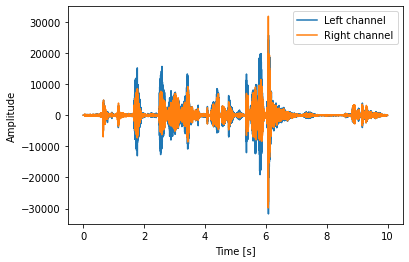

In [4]:

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
def filter_voice_not_zero(data):
    newarr = [];
    c = -1;
    i = 0;
    while i < len(data):
        el = data[i];
        if el[0] != 0 or el[1] != 0:
            newarr[c].append(el);
        else:
            newarr.append([]);
            c = c + 1
            while i < len(data)-1 and data[i+1][0] == 0 and data[i+1][1] == 0:
                i = i + 1;
        i = i + 1;
    if len(newarr[-1]) == 0:
        return newarr[0:-1];
    return newarr;

filtered_arr = filter_voice_not_zero(data);
